In [1]:
import torch
import sys

sys.path.append('..')

import SourceCode

In [2]:
from math import pi, e, sqrt
import torch

from SourceCode.utilities import nth_derivative
from SourceCode.EquationClass import OneDimensionalMainEquation
from SourceCode.DomainClass import OneDimensionalSimpleDomain
from SourceCode.InitConditionClass import OnePointInitialCondition
from SourceCode.IntegralEquations import IntegralEquations
from SourceCode.TrainerForNNEquationSolver import TrainerForNNEquationSolver
from SourceCode.ReportMaker import ReportMaker
import time

n_epochs = 10
n_points = 10
dh = 1e-3

# № 1

$$ y'(x) = \int_{0}^x(x-t)y(t)dt - 1$$
$$y(0)=1$$
$$ true\_sol = e^{-\frac{x}{2}}(cos(\frac{\sqrt{3}}{2}x) - \frac{1}{\sqrt{3}}sin(\frac{\sqrt{3}}{2}x)) $$

In [5]:
left_border = 0
right_border = 1
integration_func = lambda curr_v, int_domain, nn_model: (curr_v - int_domain)*nn_model(int_domain)
main_eq_residual = (
    lambda x, nn_model: nth_derivative(nn_model, x, 1)
    - IntegralEquations.calculateVolterraEquation1D(
        integration_func,
        nn_model,
        x,
        left_border,
        right_border,
        n_points) + torch.tensor([1.0], requires_grad=True))
n_points = 20
true_solution = lambda x: torch.exp(-x / 2) * (torch.cos(sqrt(3)/2*x) - torch.sin(sqrt(3)/2*x)/sqrt(3))
main_domain = OneDimensionalSimpleDomain(left_border + dh, right_border, n_points)


first_init_cond_res = lambda x, nn_model: nn_model(x) - torch.tensor([1.0], requires_grad=True)
first_init_cond = OnePointInitialCondition(left_border, first_init_cond_res)

boundary_conditions = [first_init_cond]

main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual, boundary_conditions)


n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.0008466392755508423
Valid max absolute error |Appr(x)-y(x)|: 0.0008341372013092041
MAPE on train data: 0.09446513722650707 %
MAPE on validation data: 0.09822639403864741 %
Max residual square loss on train at last epoch: 0.0006330013275146484 


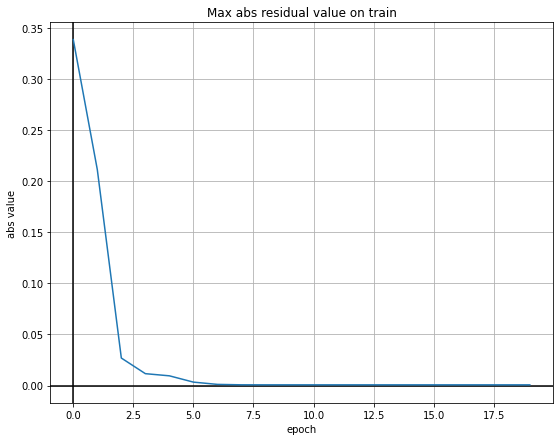

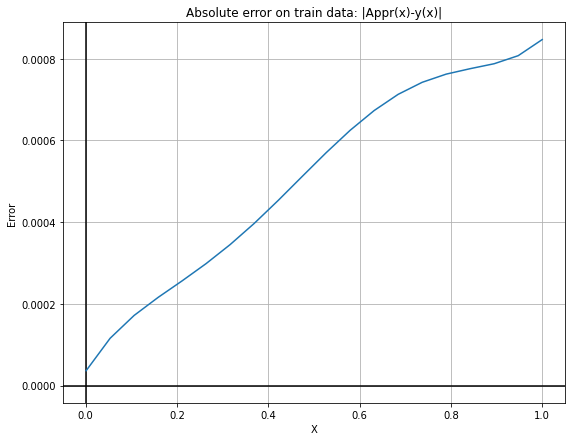

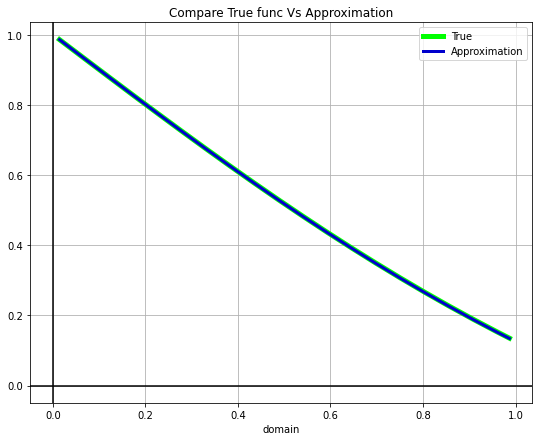

In [6]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()